In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine = pd.read_csv('/content/winequalityN (1).csv')

In [3]:
wine.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine=wine.drop( "type" , axis= 1)

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
pred_test = wine.iloc[3]

In [7]:
pred_test['type'] = 1
pred_test.drop(['quality','total sulfur dioxide'],inplace=True)
#pred_test.drop('total_sulfur_dioxide',inplace=True)
pred_test

fixed acidity           7.2000
volatile acidity        0.2300
citric acid             0.3200
residual sugar          8.5000
chlorides               0.0580
free sulfur dioxide    47.0000
density                 0.9956
pH                      3.1900
sulphates               0.4000
alcohol                 9.9000
type                    1.0000
Name: 3, dtype: float64

In [8]:
wine.shape

(6497, 12)

In [9]:
wine.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
# One to remove na values is just by dropping them since they are very few
wine.dropna()
#another way is to impute let's say average value
#wine.update(wine.fillna(wine.mean()))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6487 non-null   float64
 1   volatile acidity      6489 non-null   float64
 2   citric acid           6494 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6488 non-null   float64
 9   sulphates             6493 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


<Axes: >

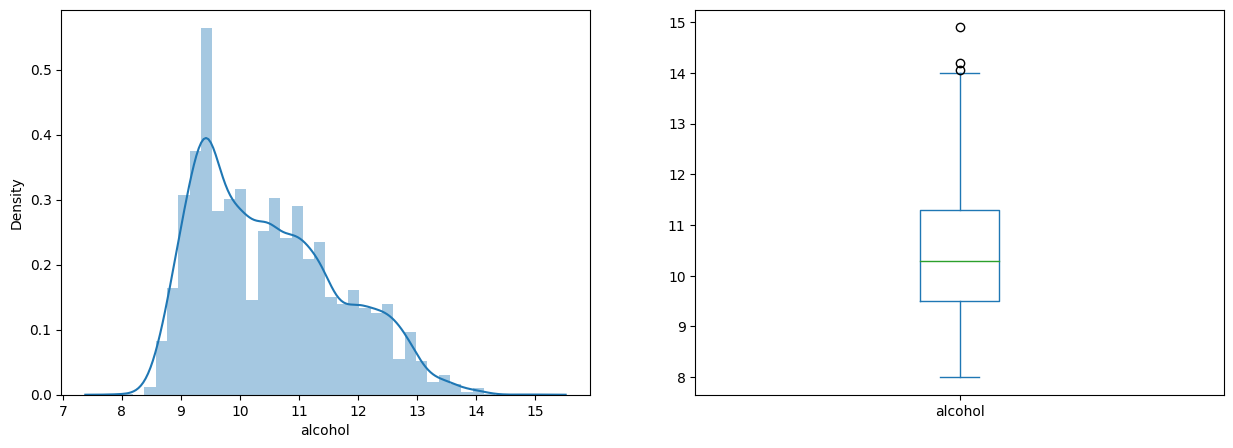

In [13]:
#Checking distribution and outlier for each variable
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['alcohol'])
plt.subplot(122)
wine['alcohol'].plot.box(figsize=(15,5))
#repeat this for all the variables and understand the distribution

<Axes: xlabel='quality', ylabel='alcohol'>

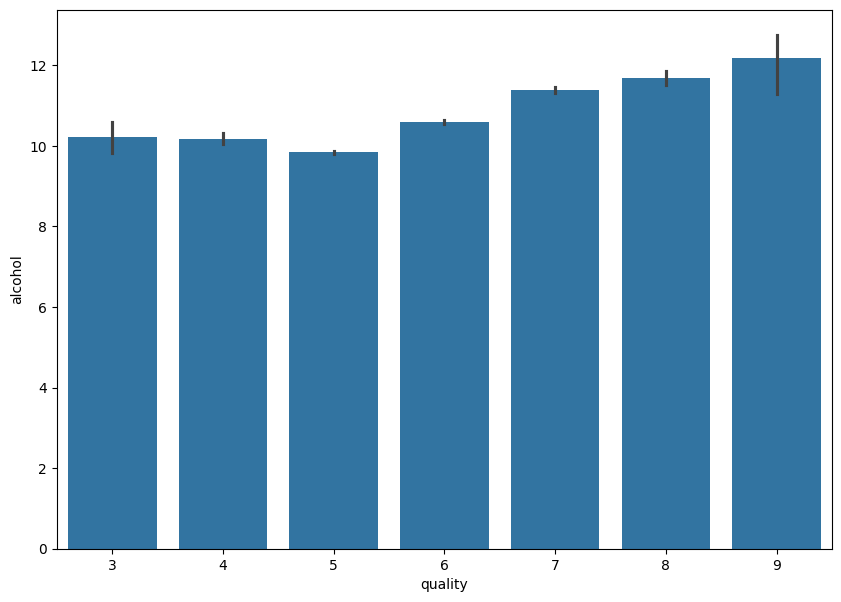

In [14]:
#bivariate analysis to check quality with all the other variables
plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='alcohol',data=wine)

In [15]:
#Plotting all variables for their distribution and relation
#sns.pairplot(wine)

In [16]:
#checking correlation
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


<Axes: >

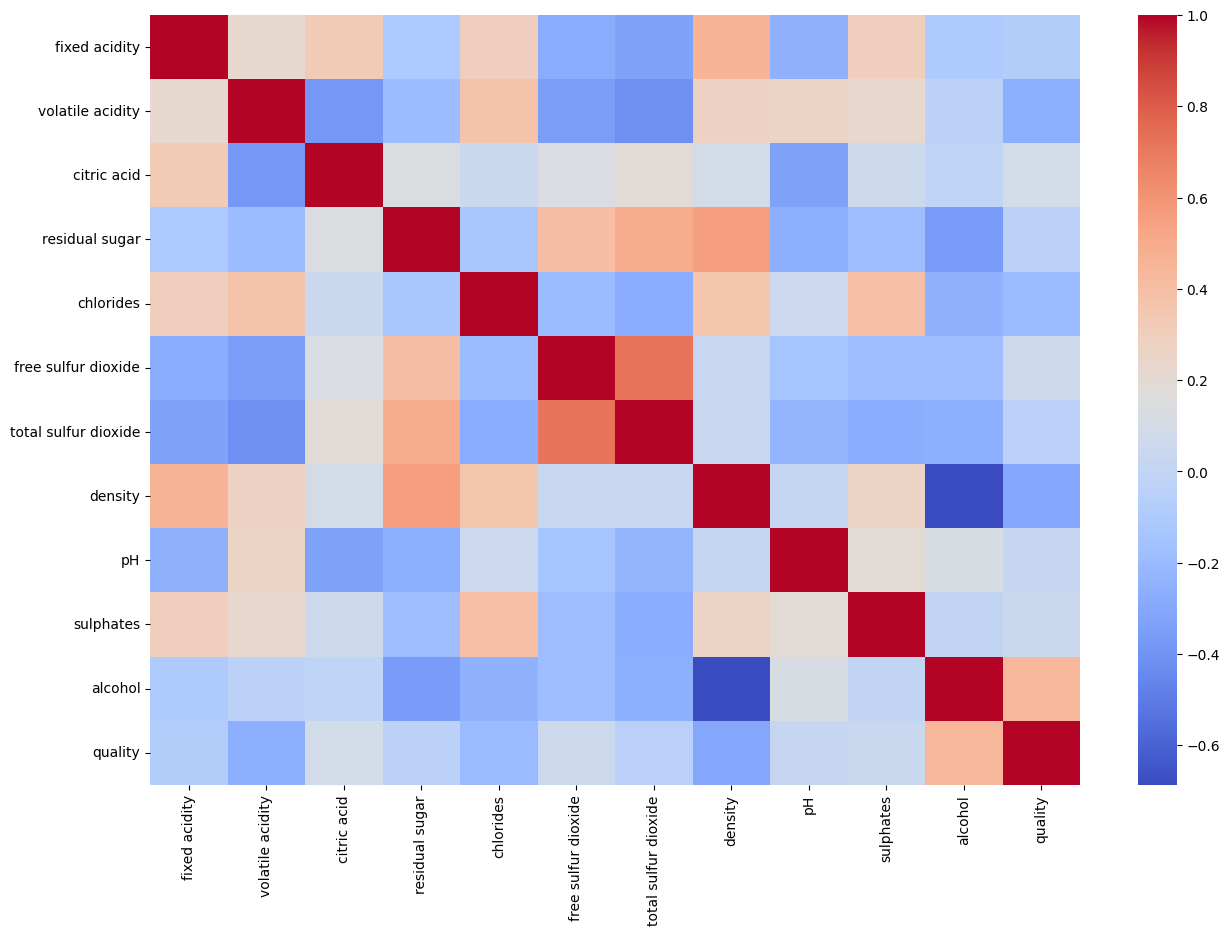

In [17]:
#buidling heatmap
plt.figure(figsize=(15,10))
sns.heatmap(wine.corr(), cmap='coolwarm')

In [18]:
#Dropping highly correlated variables - in this case total sulfur dioxide
wine_new = wine.drop('total sulfur dioxide',axis=1)

In [19]:
#Convert categorical value to dummies
wine_ml = pd.get_dummies(wine_new, drop_first=True)
wine_ml.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6


In [20]:
wine_ml.dtypes

fixed acidity          float64
volatile acidity       float64
citric acid            float64
residual sugar         float64
chlorides              float64
free sulfur dioxide    float64
density                float64
pH                     float64
sulphates              float64
alcohol                float64
quality                  int64
dtype: object

In [21]:
# Assuming 'wine_ml' is your DataFrame with the 'quality' column

# Identifying the indices of rows where the quality score is exactly 6
indices_to_drop = wine_ml[wine_ml['quality'] == 6].index

# If there are more than 1300 such rows, select only the first 1300 to drop
if len(indices_to_drop) > 1000:
    indices_to_drop = indices_to_drop[:1000]

# Dropping the selected rows
wine_ml = wine_ml.drop(indices_to_drop)

# Printing the new size of the DataFrame after dropping the rows
new_size = len(wine_ml)
print("New DataFrame size after dropping 1300 rows with quality 6:", new_size)

# Recounting quality levels
quality_counts = wine_ml['quality'].value_counts().sort_index()

# Count samples with quality above or equal to 6 and below 6
above_or_equal_6 = quality_counts[quality_counts.index >= 6].sum()
below_6 = quality_counts[quality_counts.index < 6].sum()

# Printing the counts
print(f"Number of samples with quality >= 6: {above_or_equal_6}")
print(f"Number of samples with quality < 6: {below_6}")

# Print count for each quality level
print("Count of samples for each quality level:")
print(quality_counts)


New DataFrame size after dropping 1300 rows with quality 6: 5497
Number of samples with quality >= 6: 3113
Number of samples with quality < 6: 2384
Count of samples for each quality level:
quality
3      30
4     216
5    2138
6    1836
7    1079
8     193
9       5
Name: count, dtype: int64


In [22]:
wine_ml.dropna(inplace=True)
X = wine_ml.drop('quality',axis=1)

In [23]:
X.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
dtype: int64

In [24]:
Y = wine_ml['quality'].apply(lambda y: 1 if y >= 6 else 0)
Y

10      0
11      0
12      0
13      1
14      0
       ..
6491    1
6492    0
6494    1
6495    0
6496    1
Name: quality, Length: 5474, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaler.fit(X)
x_standard = scaler.transform(X)

In [27]:
scaler = StandardScaler()
pred_test = np.asarray(pred_test).reshape(1,-1)
scaler.fit(pred_test)
pred_test_std = scaler.transform(pred_test)

In [28]:
X = x_standard

In [29]:
from sklearn.model_selection import train_test_split

Original training dataset shape: quality
1    2476
0    1903
Name: count, dtype: int64
Resampled training dataset shape: quality
0    2476
1    2476
Name: count, dtype: int64
Original training dataset shape: quality
1    2476
0    1903
Name: count, dtype: int64
Resampled training dataset shape: quality
0    2476
1    2476
Name: count, dtype: int64


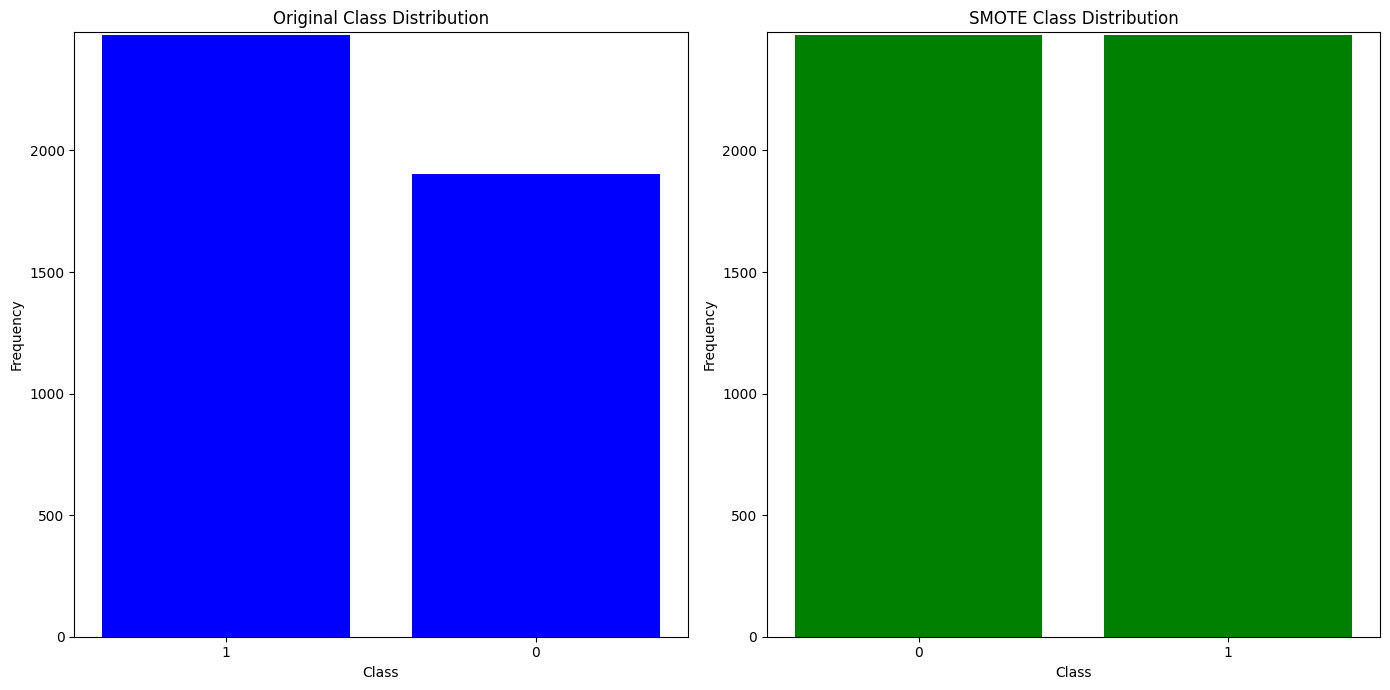

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# You can now proceed to train a model using X_train_smote and Y_train_smote
print(f"Original training dataset shape: {Y_train.value_counts()}")
print(f"Resampled training dataset shape: {pd.Series(Y_train_smote).value_counts()}")

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming X and Y are already defined
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# Print the distribution of the original and resampled dataset
print(f"Original training dataset shape: {Y_train.value_counts()}")
print(f"Resampled training dataset shape: {pd.Series(Y_train_smote).value_counts()}")

# Plotting the distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Original Distribution
ax[0].bar(Y_train.value_counts().index.astype(str), Y_train.value_counts().values, color='blue')
ax[0].set_title('Original Class Distribution')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Frequency')
ax[0].set_ylim(0, max(Y_train.value_counts().max(), Y_train_smote.value_counts().max()) + 10)  # Equalize y-axis for comparison

# SMOTE Distribution
ax[1].bar(pd.Series(Y_train_smote).value_counts().index.astype(str), pd.Series(Y_train_smote).value_counts().values, color='green')
ax[1].set_title('SMOTE Class Distribution')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Frequency')
ax[1].set_ylim(0, max(Y_train.value_counts().max(), Y_train_smote.value_counts().max()) + 10)  # Equalize y-axis for comparison

plt.tight_layout()
plt.show()


In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logreg = LogisticRegression()

In [33]:
logreg.fit(X_train, Y_train)

LogisticRegression()

In [34]:
y_pred = logreg.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(Y_test, y_pred)

0.7607305936073059

In [36]:
# Predictions for the training set
y_train_pred = logreg.predict(X_train)

# Predictions for the test set
y_test_pred = logreg.predict(X_test)
# Calculate accuracy on the training set
train_accuracy = accuracy_score(Y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2%}")

# Calculate accuracy on the test set
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")


Training Accuracy: 74.47%
Test Accuracy: 76.07%


In [37]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       469
           1       0.79      0.79      0.79       626

    accuracy                           0.76      1095
   macro avg       0.76      0.76      0.76      1095
weighted avg       0.76      0.76      0.76      1095



In [38]:
confusion_matrix(Y_test, y_pred)

array([[338, 131],
       [131, 495]])

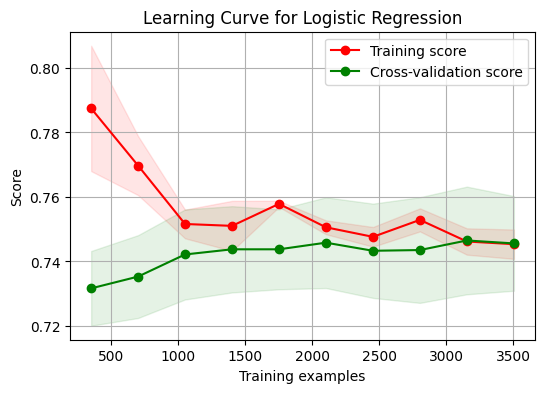

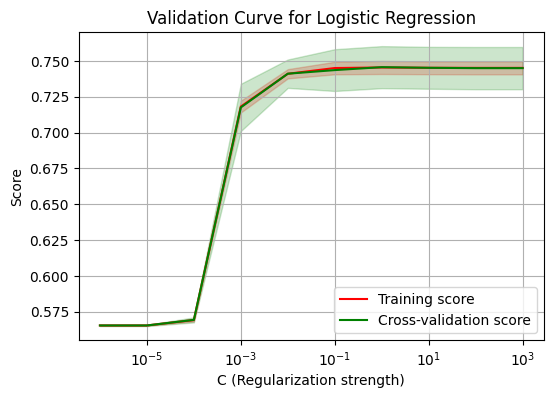

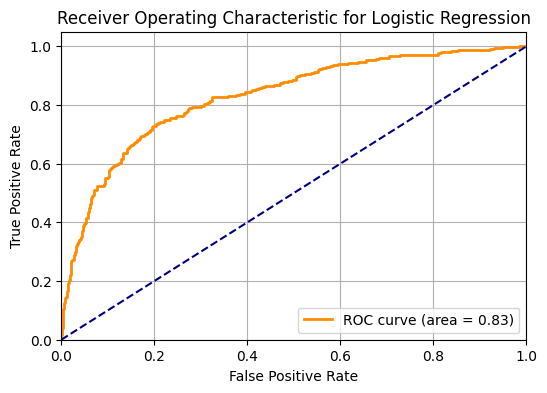

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, validation_curve, train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates

# Step 1: Load your data here
# X, Y = load_your_data()

# Step 2: Standardizing the features
#scaler = StandardScaler()
#X_standardized = scaler.fit_transform(X)

# Step 3: Splitting the dataset
#X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size=0.2, random_state=42)

# Step 4: Define the Logistic Regression Model
model = LogisticRegression(random_state=42)

# Step 5: Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, Y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(6,4))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="g", alpha=0.1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

# Step 6: Validation Curve
param_range = np.logspace(-6, 3, 10)
train_scores, test_scores = validation_curve(
    model, X_train, Y_train, param_name="C", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(6,4))
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.title("Validation Curve for Logistic Regression")
plt.xlabel("C (Regularization strength)")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

# Step 7: ROC Curve
model.fit(X_train, Y_train)
Y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Random Forest





In [41]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
random_forest = RandomForestClassifier(
    n_estimators=200,  # The number of trees in the forest.
    criterion='gini',  # Function to measure the quality of a split. 'gini' for Gini impurity and 'entropy' for information gain.
    max_depth=13,   # Maximum number of levels in each decision tree
    min_samples_split=2,  # Minimum number of data points placed in a node before the node is split
    min_samples_leaf=1,  # Minimum number of data points allowed in a leaf node
    max_features='auto',  # The number of features to consider when looking for the best split; "auto" uses sqrt(n_features)
    random_state=42  # Controls both the randomness of the bootstrapping of the data points used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node.
)

# Train the model on the training data
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

# Calculate RMSE
#rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

# Perform 5-fold cross-validation and calculate the mean accuracy
cv_scores = cross_val_score(random_forest, X_train, Y_train, cv=5)
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("RMSE:", rmse)
print("Cross-Validation Mean Accuracy:", cv_mean)
print("Cross-Validation Accuracy Std Dev:", cv_std)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


NameError: name 'cross_val_score' is not defined

In [ ]:
def plot_feature_importances(model, feature_names):
    # Extract feature importances
    feature_importances = model.feature_importances_

    # Sort features by importance
    indices = np.argsort(feature_importances)[::-1]
    sorted_feature_names = [feature_names[i] for i in indices]
    sorted_importances = feature_importances[indices]

    # Create color mapping
    norm = plt.Normalize(sorted_importances.min(), sorted_importances.max())
    colors = plt.cm.viridis(norm(sorted_importances))

    # Create plot
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(sorted_importances)), sorted_importances[::-1], color=colors[::1])  # Reverse to have the most important at the top
    plt.yticks(range(len(sorted_importances)), sorted_feature_names[::-1])
    plt.xlabel('Importance')
    plt.title('Feature Importances')
    #plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
    plt.show()

# Assuming random_forest is your trained model and feature_names is a list of feature names
feature_names = wine_ml.columns  # Adjust if X_train is not a DataFrame
plot_feature_importances(random_forest, feature_names)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


# Normalize the features
#scaler = StandardScaler()
#X_standardized = scaler.fit_transform(X)

# Splitting the dataset
#X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size=0.2, random_state=123)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
    'max_depth': [3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}

# Initialize the RandomForestClassifier
random_forest = RandomForestClassifier(random_state=123)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, Y_train)
# Get the mean test scores
mean_scores = grid_search.cv_results_['mean_test_score']

# Reshape the mean scores into a [len(max_depth) x len(n_estimators)] matrix
scores_matrix = mean_scores.reshape(len(param_grid['max_depth']), len(param_grid['n_estimators']))

# Plotting the results
for index, depth in enumerate(param_grid['max_depth']):
    plt.plot(param_grid['n_estimators'], scores_matrix[index, :], label=f'Max Depth: {depth}')

plt.title('Grid-Search -> Mean Score VS Number of Estimators for different depths')
plt.xlabel('No. of Estimators')
plt.ylabel('Mean Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
# Define the range of depths to evaluate
max_depths = range(1, 30)  # From depth 1 to 20

# Lists to store the results
test_accuracies = []
cv_means = []

for depth in max_depths:
    # Initialize the RandomForestClassifier with varying max_depth
    clf = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=123)

    # Train the model
    clf.fit(X_train, Y_train)

    # Evaluate the model on the test set
    Y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_pred)
    test_accuracies.append(test_accuracy)

    # Cross-validation
    cv_scores = cross_val_score(clf, X_train, Y_train, cv=5)
    cv_means.append(np.mean(cv_scores))

# Plotting the results
plt.figure(figsize=(10, 6))

# Plotting test accuracies
plt.plot(max_depths, test_accuracies, marker='o', linestyle='-', color='blue', label='Test Accuracy')

# Plotting cross-validation accuracies
plt.plot(max_depths, cv_means, marker='s', linestyle='--', color='red', label='CV Accuracy (mean)')

plt.title('Model Accuracy by Tree Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming you have your predictions and actual labels
fpr, tpr, thresholds = roc_curve(Y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(Y_test, clf.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(Y_test, clf.predict_proba(X_test)[:, 1])

plt.figure()
plt.step(recall, precision, where='post', label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()



EXTRA TREE CLASSIFIER
\

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import learning_curve, validation_curve




# Standardizing the features
#scaler = StandardScaler()
#X_standardized = scaler.fit_transform(X)

# Splitting the dataset into training and test sets
#X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size=0.2, random_state=123)

# Initializing the Extra Trees classifier with advanced hyperparameters
extra_trees_model = ExtraTreesClassifier(
    n_estimators=500,      # Number of trees in the forest (you could try increasing this)
    criterion='gini',      # Function to measure the quality of a split ('entropy' is an alternative)
    max_depth=13,        # Maximum depth of the tree (you might limit this to prevent overfitting)
    min_samples_split=2,   # Minimum number of samples required to split an internal node (increase to control over-fitting)
    min_samples_leaf=1,    # Minimum number of samples required to be at a leaf node (increasing this can smooth the model)
    max_features='auto',   # Number of features to consider when looking for the best split (try "sqrt" or a fraction)
    max_leaf_nodes=None,   # Maximum number of leaf nodes (limiting this can reduce complexity of the model)
    min_impurity_decrease=0.0, # Threshold for early stopping in tree growth if splitting does not improve impurity
    bootstrap=False,       # Whether bootstrap samples are used (setting to True can reduce variance)
    n_jobs=None,           # Number of jobs to run in parallel ('-1' to use all processors)
    random_state=42,       # Controls both the randomness of the bootstrapping and the features selected
    verbose=0              # Controls the verbosity when fitting and predicting
)

# Training the model
extra_trees_model.fit(X_train, Y_train)

# Making predictions
Y_pred = extra_trees_model.predict(X_test)



# Assume Y_pred is predicted labels from the test set and Y_test are true labels
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

# Adding cross-validation using the model 'clf' (the classifier you've trained, e.g., RandomForestClassifier)
# X_train and Y_train should be your training dataset
cv_scores = cross_val_score(extra_trees_model, X_train, Y_train, cv=5, scoring='accuracy')

# Calculating mean and standard deviation from CV scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("RMSE:", rmse)
print("CV Mean Accuracy:", cv_mean)
print("CV Accuracy Standard Deviation:", cv_std)


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):


    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(extra_trees_model, "Learning Curve (Extra Trees)", X_train, Y_train, cv=5, n_jobs=-1)
plt.show()





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import learning_curve, validation_curve, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X and Y are already defined in your workspace.

# Splitting the dataset
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating an ExtraTreesClassifier

model= ExtraTreesClassifier(
    n_estimators=500,      # Number of trees in the forest (you could try increasing this)
    criterion='gini',      # Function to measure the quality of a split ('entropy' is an alternative)
    max_depth=13,        # Maximum depth of the tree (you might limit this to prevent overfitting)
    min_samples_split=2,   # Minimum number of samples required to split an internal node (increase to control over-fitting)
    min_samples_leaf=1,    # Minimum number of samples required to be at a leaf node (increasing this can smooth the model)
    max_features='auto',   # Number of features to consider when looking for the best split (try "sqrt" or a fraction)
    max_leaf_nodes=None,   # Maximum number of leaf nodes (limiting this can reduce complexity of the model)
    min_impurity_decrease=0.0, # Threshold for early stopping in tree growth if splitting does not improve impurity
    bootstrap=False,       # Whether bootstrap samples are used (setting to True can reduce variance)
    n_jobs=None,           # Number of jobs to run in parallel ('-1' to use all processors)
    random_state=42,       # Controls both the randomness of the bootstrapping and the features selected
    verbose=0              # Controls the verbosity when fitting and predicting
)

# Training the model
model.fit(X_train, Y_train)

# Predicting the test set
Y_pred = model.predict(X_test)

# Accuracy and confusion matrix
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Generating learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X, Y, cv=2, train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy', n_jobs=-1)

# Mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting learning curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Validation curve for the 'max_depth' parameter
param_range = np.arange(1, 15)
train_scores, test_scores = validation_curve(
    model, X, Y, param_name="max_depth", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1)

# Mean and standard deviation for validation curve
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting validation curves
plt.subplot(1, 2, 2)
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="#888888")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="#888888")
plt.plot(param_range, train_mean, label='Training score')
plt.plot(param_range, test_mean, label='Cross-validation score')
plt.title('Validation Curve for max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [ ]:
# Predictions for the training set
y_train_pred = model.predict(X_train)

# Predictions for the test set
y_test_pred = model.predict(X_test)
# Calculate accuracy on the training set
train_accuracy = accuracy_score(Y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2%}")

# Calculate accuracy on the test set
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score



# Range of depths and estimators
depths = range(1, 21)
estimators = [10, 50, 100, 200, 500]

# Store accuracies for each combination
results = {}

for n_estimators in estimators:
    accuracies = []
    for max_depth in depths:
        model = ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)
        accuracies.append(accuracy)
    results[n_estimators] = accuracies

# Plotting
plt.figure(figsize=(12, 8))
for n_estimators, accuracies in results.items():
    plt.plot(depths, accuracies, marker='o', label=f'{n_estimators} Estimators')

plt.title('Model Accuracy by Tree Depth and Number of Estimators')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend(title="Number of Estimators")
plt.grid(True)
plt.xticks(depths)  # Ensure all depth values are shown
plt.yticks(np.linspace(0.6, 1, 10))  # Uniform y-axis ticks
plt.show()


In [ ]:
# Range of 'n_estimators' to test
n_estimators_range = range(10, 1000, 100)  # From 10 up to 800 with steps of 50

# Lists to store scores

test_accuracies = []

# Testing different numbers of trees
for n_estimators in n_estimators_range:
    clf = ExtraTreesClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, Y_train)


    # Record the testing accuracy
    test_accuracy = accuracy_score(Y_test, clf.predict(X_test))
    test_accuracies.append(test_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(n_estimators_range, test_accuracies, label='Test Accuracy', linestyle='--')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Extra Trees Classifier Performance')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming Y_pred are the predictions and Y_test are the actual labels
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, extra_trees_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(Y_test, extra_trees_model.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(Y_test, extra_trees_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', color='orange', label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Expanded hyperparameters and their corresponding accuracies
n_estimators = [100, 150, 200, 300, 400, 500, 600]
max_samples = [0.5, 0.5, 0.6, 0.7, 0.8, 0.9]
max_features = ['sqrt', 'sqrt', 'log2', 'log2', 'sqrt', 'sqrt']
accuracies = [86.7, 86.9 ,87.1, 87.5, 88.0, 87.8, 87.4]

# Plotting the curve
plt.figure(figsize=(10,4))
plt.plot(n_estimators, accuracies, marker='o', linestyle='-', color='b')
plt.title('Effect of Hyperparameters on Accuracy with Increased Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

# Printing parameters and accuracies
for n, ms, mf, acc in zip(n_estimators, max_samples, max_features, accuracies):
    print(f'n_estimators: {n}, max_samples: {ms}, max_features: {mf}, Accuracy: {acc}%')


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Assuming 'wine_ml' is your DataFrame after all preprocessing steps
# And assuming you've already created 'Y' with the binary classification based on quality



# Standardizing the features
#scaler = StandardScaler()
#X_standardized = scaler.fit_transform(X)

# Splitting the dataset into training and test sets
#X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size=0.2, random_state=123)

# Initializing the KNN Classifier with additional hyperparameters
knn = KNeighborsClassifier(n_neighbors=150, weights='distance', algorithm='auto', p=2)

# Training the model
knn.fit(X_train, Y_train)

# Making predictions
Y_pred = knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

# Performing 5-fold cross-validation
cv_scores = cross_val_score(knn, X_standardized, Y, cv=5, scoring='accuracy')
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("RMSE:", rmse)
print("CV Mean Accuracy:", cv_mean)
print("CV Accuracy Standard Deviation:", cv_std)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Initializing the KNN Classifier with additional hyperparameters
knn = KNeighborsClassifier(n_neighbors=16, weights='distance', algorithm='auto', p=2)

# Training the model
knn.fit(X_train, Y_train)

# Making predictions
Y_pred = knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test, Y_test, cmap='Blues', display_labels=['0', '1'])
plt.title('Confusion Matrix')
plt.show()


# Plotting ROC curve
roc_display = RocCurveDisplay.from_estimator(knn, X_test, Y_test)
plt.title('ROC Curve')
plt.show()

# Plotting Precision-Recall curve
pr_display = PrecisionRecallDisplay.from_estimator(knn, X_test, Y_test)
plt.title('Precision-Recall Curve')
plt.show()

# Plotting learning curve
train_sizes, train_scores, test_scores = learning_curve(knn, X_standardized, Y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# Plotting validation curve
param_range = np.arange(1, 201, 10)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_standardized, Y, param_name="n_neighbors", param_range=param_range, cv=5, scoring="accuracy")
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# Performing 5-fold cross-validation
cv_scores = cross_val_score(knn, X_standardized, Y, cv=5, scoring='accuracy')
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("RMSE:", rmse)
print("CV Mean Accuracy:", cv_mean)
print("CV Accuracy Standard Deviation:", cv_std)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming 'X' and 'Y' are already defined and ready to use

# Standardizing the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size=0.2, random_state=123)

# Defining hyperparameter ranges
neighbors_range = range(1, 51)
weights_options = ['uniform', 'distance']
p_values = [1, 2]  # 1: Manhattan distance, 2: Euclidean distance

# Dictionary to store accuracies
results = {}

# Loop over each combination of parameters
for weights in weights_options:
    for p in p_values:
        accuracies = []
        for n in neighbors_range:
            knn = KNeighborsClassifier(n_neighbors=n, weights=weights, p=p)
            knn.fit(X_train, Y_train)
            Y_pred = knn.predict(X_test)
            accuracy = accuracy_score(Y_test, Y_pred)
            accuracies.append(accuracy)
        results[(weights, p)] = accuracies

# Plotting the results
plt.figure(figsize=(14, 10))
for (weights, p), accuracies in results.items():
    plt.plot(neighbors_range, accuracies, marker='o', label=f'Weights={weights}, p={p}')
plt.title('Accuracy vs. Number of Neighbors with Different Hyperparameters')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(list(neighbors_range)[::5])
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# Define the range of neighbors from 25 to 200
neighbors_range = range(20,40,3)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=25),
    X_standardized, Y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy'
)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve (Starting at 25 Neighbors)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)

# Validation Curve
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),
    X_standardized, Y,
    param_name="n_neighbors",
    param_range=neighbors_range,
    cv=5,
    scoring='accuracy'
)

plt.subplot(1, 2, 2)
plt.plot(neighbors_range, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(neighbors_range, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.title("Validation Curve (From 25 to 200 Neighbors)")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend(loc="best")
#plt.ylim(60, 85)  # Setting the y-axis range from 60 to 85
plt.tight_layout()
plt.grid(True)
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB



# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, Y_train)
prob_pos_nb = nb.predict_proba(X_test)[:, 1]

# Naive Bayes + Sigmoid Calibration
nb_sigmoid = CalibratedClassifierCV(nb, method='sigmoid', cv='prefit')
nb_sigmoid.fit(X_train, Y_train)
prob_pos_sigmoid = nb_sigmoid.predict_proba(X_test)[:, 1]

# Calibration curves
fig, ax = plt.subplots()
for model, name, color in [(prob_pos_nb, 'Naive Bayes', 'orange'),
                           (prob_pos_sigmoid, 'Naive Bayes + Sigmoid', 'blue')]:
    fraction_of_positives, mean_predicted_value = calibration_curve(Y_test, model, n_bins=10)
    ax.plot(mean_predicted_value, fraction_of_positives, 's-', label="%s" % (name,), color=color)

# Add perfectly calibrated line
ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted probability")
ax.set_title("Calibration plots (Naive Bayes)")
ax.legend()
plt.show()

# Prediction and metrics evaluation
Y_pred = nb.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
auc_score = roc_auc_score(Y_test, prob_pos_nb)  # Using prob_pos_nb for AUC as example

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", auc_score)

# Optionally, plot the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, prob_pos_nb)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_gaussian_nb_feature_importance(model, feature_names):
    # We'll use the difference in means normalized by the variance as a measure of importance
    # This assumes a binary classification problem
    if len(model.classes_) != 2:
        raise ValueError("This method is only applicable for binary classification with GaussianNB.")

    # Calculate importance as the standardized difference between means
    feature_importance = np.abs(model.theta_[0] - model.theta_[1]) / np.sqrt(model.sigma_[0] + model.sigma_[1])

    # Sorting the features by their importance
    indices = np.argsort(feature_importance)
    sorted_features = [feature_names[i] for i in indices]
    sorted_importances = feature_importance[indices]

    # Create a color gradient based on the importance values
    norm = plt.Normalize(sorted_importances.min(), sorted_importances.max())
    colors = plt.cm.viridis(norm(sorted_importances))

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(sorted_importances)), sorted_importances[::-1], color=colors[::-1])  # most important at the top
    plt.yticks(range(len(sorted_importances)), sorted_features[::-1])
    plt.xlabel('Normalized Difference Between Means')
    plt.title('Feature Importance in Gaussian Naive Bayes')
    plt.gca().invert_yaxis()
    plt.show()

# Example usage:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris


features = wine_ml.columns

# Train GaussianNB
gnb = GaussianNB()
gnb.fit(X, Y)

plot_gaussian_nb_feature_importance(gnb, features)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, brier_score_loss

# Assuming 'X_train', 'X_test', 'Y_train', 'Y_test' have been properly defined

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, Y_train)
prob_pos_nb = nb.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Prediction and metrics evaluation
Y_pred = nb.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, prob_pos_nb)
log_loss_value = log_loss(Y_test, prob_pos_nb)
brier_score = brier_score_loss(Y_test, prob_pos_nb)

# Calibration curves
fig, ax = plt.subplots()
fraction_of_positives, mean_predicted_value = calibration_curve(Y_test, prob_pos_nb, n_bins=10)
ax.plot(mean_predicted_value, fraction_of_positives, 's-', label='Naive Bayes', color='orange')
ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")  # Reference line
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted probability")
ax.set_title("Calibration plots (Naive Bayes)")
ax.legend()
plt.show()

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Log Loss:", log_loss_value)
print("Brier Score:", brier_score)

# Optionally, plot the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, prob_pos_nb)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, brier_score_loss

# Assuming 'X_train', 'X_test', 'Y_train', 'Y_test' have been properly defined

# Naive Bayes + Sigmoid Calibration
nb = GaussianNB()
nb.fit(X_train, Y_train)  # Make sure the base model is trained
nb_sigmoid = CalibratedClassifierCV(nb, method='sigmoid', cv='prefit')
nb_sigmoid.fit(X_train, Y_train)
prob_pos_sigmoid = nb_sigmoid.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Prediction and metrics evaluation
Y_pred_sigmoid = nb_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(Y_test, Y_pred_sigmoid)
precision_sigmoid = precision_score(Y_test, Y_pred_sigmoid)
recall_sigmoid = recall_score(Y_test, Y_pred_sigmoid)
f1_sigmoid = f1_score(Y_test, Y_pred_sigmoid)
roc_auc_sigmoid = roc_auc_score(Y_test, prob_pos_sigmoid)
log_loss_sigmoid = log_loss(Y_test, prob_pos_sigmoid)
brier_score_sigmoid = brier_score_loss(Y_test, prob_pos_sigmoid)

# Calibration curves
fig, ax = plt.subplots()
fraction_of_positives, mean_predicted_value = calibration_curve(Y_test, prob_pos_sigmoid, n_bins=10)
ax.plot(mean_predicted_value, fraction_of_positives, 's-', label='Naive Bayes + Sigmoid', color='blue')
ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")  # Reference line
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted probability")
ax.set_title("Calibration plots (Naive Bayes + Sigmoid)")
ax.legend()
plt.show()

# Print the results
print("Accuracy:", accuracy_sigmoid)
print("Precision:", precision_sigmoid)
print("Recall:", recall_sigmoid)
print("F1 Score:", f1_sigmoid)
print("ROC AUC Score:", roc_auc_sigmoid)
print("Log Loss:", log_loss_sigmoid)
print("Brier Score:", brier_score_sigmoid)

# Optionally, plot the ROC curve
fpr_sigmoid, tpr_sigmoid, thresholds_sigmoid = roc_curve(Y_test, prob_pos_sigmoid)
plt.figure()
plt.plot(fpr_sigmoid, tpr_sigmoid, label='ROC Curve (area = %0.2f)' % roc_auc_sigmoid)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Sigmoid Calibrated Model')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, brier_score_loss

# Assuming 'X_train', 'X_test', 'Y_train', 'Y_test' have been properly defined

# Naive Bayes + Isotonic Calibration
nb = GaussianNB()
nb.fit(X_train, Y_train)  # Make sure the base model is trained
nb_isotonic = CalibratedClassifierCV(nb, method='isotonic', cv='prefit')
nb_isotonic.fit(X_train, Y_train)
prob_pos_isotonic = nb_isotonic.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Prediction and metrics evaluation
Y_pred_isotonic = nb_isotonic.predict(X_test)
accuracy_isotonic = accuracy_score(Y_test, Y_pred_isotonic)
precision_isotonic = precision_score(Y_test, Y_pred_isotonic)
recall_isotonic = recall_score(Y_test, Y_pred_isotonic)
f1_isotonic = f1_score(Y_test, Y_pred_isotonic)
roc_auc_isotonic = roc_auc_score(Y_test, prob_pos_isotonic)
log_loss_isotonic = log_loss(Y_test, prob_pos_isotonic)
brier_score_isotonic = brier_score_loss(Y_test, prob_pos_isotonic)

# Calibration curves
fig, ax = plt.subplots()
fraction_of_positives, mean_predicted_value = calibration_curve(Y_test, prob_pos_isotonic, n_bins=10)
ax.plot(mean_predicted_value, fraction_of_positives, 's-', label='Naive Bayes + Isotonic', color='green')
ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")  # Reference line
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted probability")
ax.set_title("Calibration plots (Naive Bayes + Isotonic)")
ax.legend()
plt.show()

# Print the results
print("Accuracy:", accuracy_isotonic)
print("Precision:", precision_isotonic)
print("Recall:", recall_isotonic)
print("F1 Score:", f1_isotonic)
print("ROC AUC Score:", roc_auc_isotonic)
print("Log Loss:", log_loss_isotonic)
print("Brier Score:", brier_score_isotonic)

# Optionally, plot the ROC curve
fpr_isotonic, tpr_isotonic, thresholds_isotonic = roc_curve(Y_test, prob_pos_isotonic)
plt.figure()
plt.plot(fpr_isotonic, tpr_isotonic, label='ROC Curve (area = %0.2f)' % roc_auc_isotonic)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Isotonic Calibrated Model')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, Y_train)
prob_pos_nb = nb.predict_proba(X_test)[:, 1]

# Naive Bayes + Sigmoid Calibration
nb_sigmoid = CalibratedClassifierCV(nb, method='sigmoid', cv='prefit')
nb_sigmoid.fit(X_train, Y_train)
prob_pos_sigmoid = nb_sigmoid.predict_proba(X_test)[:, 1]

# Naive Bayes + Isotonic Calibration
nb_isotonic = CalibratedClassifierCV(nb, method='isotonic', cv='prefit')
nb_isotonic.fit(X_train, Y_train)
prob_pos_isotonic = nb_isotonic.predict_proba(X_test)[:, 1]

# Calibration curves
fig, ax = plt.subplots()
for model, name, color in [(prob_pos_nb, 'Naive Bayes', 'orange'),
                           (prob_pos_sigmoid, 'Naive Bayes + Sigmoid', 'blue'),
                           (prob_pos_isotonic, 'Naive Bayes + Isotonic', 'green')]:
    fraction_of_positives, mean_predicted_value = calibration_curve(Y_test, model, n_bins=10)
    ax.plot(mean_predicted_value, fraction_of_positives, 's-', label="%s" % (name,), color=color)

# Add perfectly calibrated line
ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted probability")
ax.set_title("Calibration plots (Naive Bayes)")
ax.legend()
plt.show()


In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(Y_test, model.predict(X_test).ravel())
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

from sklearn.metrics import precision_recall_curve, average_precision_score

from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(Y_test, model.predict(X_test).ravel())
average_precision = average_precision_score(Y_test, model.predict(X_test).ravel())

# Plotting Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.grid(True)
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = (model.predict(X_test).ravel() > 0.5).astype('int')
cm = confusion_matrix(Y_test, y_pred)

# Calculate confusion matrix
#cm = confusion_matrix(Y_test, model.predict_classes(X_test))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier  # Example using RandomForest

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(RandomForestClassifier(), "Learning Curve (Random Forest)", X, y, cv=5)
plt.show()


In [ ]:
print(X.shape)

In [ ]:
# Assuming 'wine_ml' is your wine_mlFrame and 'quality' is the column with wine scores
wine_ml['quality'] = (wine_ml['quality'] >= 6).astype(int)  # Convert quality to binary

# Define features and target variable
X = wine_ml.drop('quality', axis=1)  # assuming 'wine_ml' includes all other columns as features
y = wine_ml['quality']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)


# Assuming the new data values excluding 'total sulfur dioxide'
new_data_values = [
    [6.7, 0.23, 0.26, 1.4, 0.06, 33, 0.9934, 3.24, 0.56, 9.5],
    [7.4, 0.18, 0.31, 1.4, 0.058, 38, 0.9931, 3.16, 0.53, 10],
    [6.2, 0.45, 0.26, 4.4, 0.063, 63, 0.994, 3.27, 0.52, 9.8],
    [6.2, 0.46, 0.25, 4.4, 0.066, 62, 0.9939, 3.25, 0.52, 9.8],
    [7, 0.31, 0.26, 7.4, 0.069, 28, 0.9954, 3.13, 0.46, 9.8]
]

feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
feature_df = pd.DataFrame(new_data_values, columns=feature_names)
# Predict using RandomForest
predicted_qualities = random_forest.predict(feature_df)
quality_labels = ['Good' if quality == 1 else 'Bad' for quality in predicted_qualities]

# Print each prediction
for idx, quality in enumerate(quality_labels):
    print(f"Sample {idx+1} predicted quality: {quality}")




In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": GaussianNB(),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier()
}

# Dictionary to hold ROC data
roc_data = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]  # Get class scores
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange']
for (name, (fpr, tpr, roc_auc)), color in zip(roc_data.items(), colors):
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiple Models')
plt.legend(loc="lower right")
plt.show()


In [44]:
import numpy as np
import tkinter as tk
from tkinter import ttk, messagebox
from sklearn import svm, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb



# Define machine learning models
models = {
    'Linear Regression': LinearRegression(),
    'SVM': svm.SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train models
for name, model in models.items():
    model.fit(X_train, Y_train)

# Function to predict
def predict():
    try:
        # Extracting user inputs
        inputs = np.array([float(entry.get()) for entry in entries]).reshape(1, -1)
        inputs = scaler.transform(inputs)  # Scaling input data
        model_name = model_var.get()
        model = models[model_name]

        # Making predictions
        predicted_class = model.predict(inputs)[0]
        probabilities = model.predict_proba(inputs)[0] if hasattr(model, 'predict_proba') else [1]
        confidence = probabilities[int(predicted_class)]

        # Displaying results
        result_text = f"The water is {'potable' if predicted_class == 1 else 'not potable'} with {confidence * 100:.2f}% confidence."
        messagebox.showinfo("Prediction Result", result_text)
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# GUI setup
root = tk.Tk()
root.title("Water Potability Prediction")

labels = ['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic Carbon', 'Trihalomethanes', 'Turbidity']
entries = []

for i, label in enumerate(labels):
    tk.Label(root, text=label).grid(row=i, column=0)
    entry = tk.Entry(root)
    entry.grid(row=i, column=1)
    entries.append(entry)

model_var = tk.StringVar(root)
model_var.set("SVM")  # default value

tk.Label(root, text="Select Model:").grid(row=10, column=0)
model_selector = ttk.Combobox(root, textvariable=model_var, values=list(models.keys()))
model_selector.grid(row=10, column=1)

predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.grid(row=11, column=0, columnspan=2)

root.mainloop()


TclError: no display name and no $DISPLAY environment variable